# Exploring SD variation over different pixels

I'm wondering if I will find that some SD pixels match the DALEC data better than others

This could be a way to show that the 2023 DALEC data is indeed representative, but perhaps of pixels from a certain location, maybe where there is more bottom signal, or signal from macrophytes

^^ this is really the aim - if we can show that the DALEC data is representative of REAL optical conditions, then we're in a good place. Would also be interesting to see if any pixels from 2022 look like the DALEC 2023 data...

In [7]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'functions/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 

import SD_raster_loading
import SD_NC_loading
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad
import spectralConv
import seaborn as sns
import scipy as sp
from datetime import timedelta
import matplotlib.dates as mdates

In [99]:
dalec_df = pd.read_csv('DALEC_SD_bands_2022_23.csv')
dalec_df.drop(['Unnamed: 0', 'month', 'year'], axis=1, inplace=True)
dalec_df.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)

In [100]:
dalec_df['date'] = pd.to_datetime(dalec_df.date).dt.date
dalec_df['Date'] = pd.to_datetime(dalec_df.Date)
dalec_df

,Date,Rrs_DALEC,Wavelength,date
0,2022-07-28 10:00:00,0.003075,444.0,2022-07-28
1,2022-07-28 10:00:00,0.004414,492.0,2022-07-28
2,2022-07-28 10:00:00,0.006922,533.0,2022-07-28
3,2022-07-28 10:00:00,0.008089,566.0,2022-07-28
4,2022-07-28 10:00:00,0.006371,612.0,2022-07-28
...,...,...,...,...
37907,2023-09-30 12:50:00,0.004569,566.0,2023-09-30
37908,2023-09-30 12:50:00,0.004379,612.0,2023-09-30
37909,2023-09-30 12:50:00,0.003612,666.0,2023-09-30
37910,2023-09-30 12:50:00,0.003717,707.0,2023-09-30


In [111]:

#coord = [56.14693897799395, -3.923458784671348] # this is approx the location of the DALEC
coord = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch
sds_23 = SD_NC_loading.load_multiple_SDs('planetData/Airthrey-2023-Jul-Oct_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(10,10))

sds_22 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey_2022_Apr-Sept_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(10,10))

sds_23_1 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey2023-Apr-June_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(10,10))

date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 f

In [112]:
sds = pd.concat([sds_22.reset_index(), sds_23_1.reset_index(), sds_23.reset_index()], axis=0)
sds

,Date,Wavelength,rho_s_58_89,rho_s_58_90,rho_s_58_91,rho_s_58_92,rho_s_58_93,rho_s_58_94,rho_s_58_95,rho_s_58_96,...,rho_s_67_89,rho_s_67_90,rho_s_67_91,rho_s_67_92,rho_s_67_93,rho_s_67_94,rho_s_67_95,rho_s_67_96,rho_s_67_97,rho_s_67_98
0,2022-04-19 10:47:11+00:00,444.0,0.004335,0.005988,0.006214,0.006121,0.006187,0.006919,0.008128,0.00911,...,0.007929,0.008022,0.006786,0.005748,0.00652,0.006493,0.006906,0.00761,0.007477,0.007703
1,2022-04-19 10:47:11+00:00,492.0,0.004942,0.004848,0.004836,0.004296,0.004061,0.004355,0.004343,0.002907,...,0.004813,0.004848,0.004813,0.004707,0.004731,0.004648,0.004507,0.004249,0.00419,0.003825
2,2022-04-19 10:47:11+00:00,533.0,0.005692,0.005316,0.005365,0.005389,0.004843,0.005255,0.005741,0.005316,...,0.005656,0.005158,0.004503,0.0046,0.005729,0.005911,0.005268,0.004612,0.005705,0.006214
3,2022-04-19 10:47:11+00:00,566.0,0.007829,0.007486,0.007608,0.008343,0.008025,0.007743,0.007841,0.008147,...,0.008025,0.007547,0.007486,0.007963,0.008478,0.008465,0.008184,0.007571,0.0074,0.007743
4,2022-04-19 10:47:11+00:00,612.0,0.006636,0.00726,0.00712,0.006025,0.005974,0.006407,0.007502,0.007553,...,0.006458,0.006611,0.006929,0.006611,0.006407,0.006687,0.0074,0.006853,0.0074,0.00698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2023-10-11 10:31:23+00:00,566.0,0.008121,0.007877,0.007314,0.007088,0.007633,0.007783,0.007689,0.007745,...,0.007764,0.007952,0.007464,0.007407,0.00752,0.007314,0.006938,0.00722,0.007802,0.007558
220,2023-10-11 10:31:23+00:00,612.0,0.00695,0.006401,0.006146,0.006616,0.007499,0.006969,0.00593,0.007146,...,0.005596,0.005616,0.005812,0.006146,0.007303,0.008126,0.007067,0.006518,0.007812,0.007695
221,2023-10-11 10:31:23+00:00,666.0,0.005691,0.005951,0.005572,0.005312,0.00617,0.00651,0.00629,0.00617,...,0.005552,0.005432,0.005991,0.005891,0.00619,0.006829,0.00649,0.005831,0.005811,0.006111
222,2023-10-11 10:31:23+00:00,707.0,0.008352,0.007586,0.008012,0.008991,0.008906,0.008416,0.008246,0.009034,...,0.007884,0.009012,0.007522,0.008821,0.007692,0.00716,0.00782,0.006755,0.007543,0.008118


In [113]:
# load list of good files from data review csv...
good_df = pd.read_csv('planetData/good_data_review.csv')
extra_good = good_df.copy()
# select everything except images with cloud cover
extra_good = good_df.copy()[good_df['flag'] != 'cloud']
# uncomment this line for selection of only 'good' images
#extra_good = good_df.copy()[good_df['atmospheric interference at measurement points'] == 'good']

good_files = []
for f in extra_good.filename:
    #good_files.append(f[1:5] + '_' + f[5:7] + '_' + f[7:9] + '_' + f[10:12]+ '_' + f[12:14]+ '_' + f[14:16])
    good_files.append(f[1:16])

good_dates = pd.to_datetime(good_files, format='%Y%m%d_%H%M%S', utc=True)
# remove bad dates
sds = sds[sds.Date.isin(good_dates)]

In [114]:
extra_good['Date'] = good_dates
extra_good['Sat_ID'] = [f[20:24] for f in extra_good.filename]
extra_good[['Date', 'Sat_ID', 'flag']]

,Date,Sat_ID,flag
0,2022-09-24 10:27:33+00:00,2429,good
1,2022-09-14 10:23:16+00:00,2448,good
2,2022-04-19 10:47:11+00:00,2276,good
3,2022-09-10 11:04:21+00:00,249c,good
4,2022-09-14 10:23:14+00:00,2448,good
...,...,...,...
105,2023-06-02 10:28:55+00:00,24c9,good
106,2023-05-30 10:20:20+00:00,2459,good
107,2023-04-15 10:24:33+00:00,2465,good
108,2023-04-15 10:24:30+00:00,2465,good


In [115]:
sds = sds.merge(extra_good[['Date', 'Sat_ID', 'flag']], on='Date')

In [116]:
sds['date'] = sds.Date.dt.date


In [117]:
sds_melt = pd.melt(sds, id_vars=['Date', 'date', 'Wavelength', 'Sat_ID', 'flag'],
                   var_name='location', value_name='Rrs')

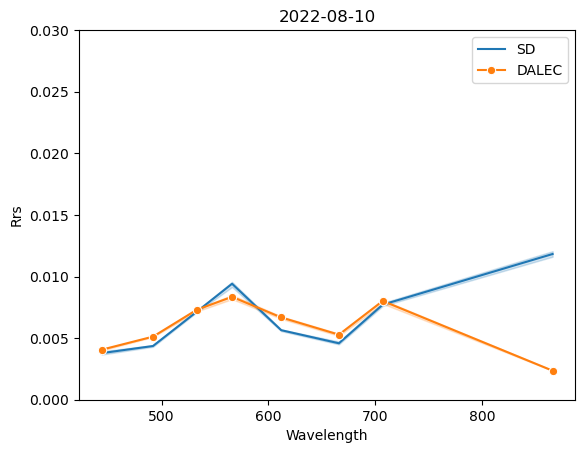

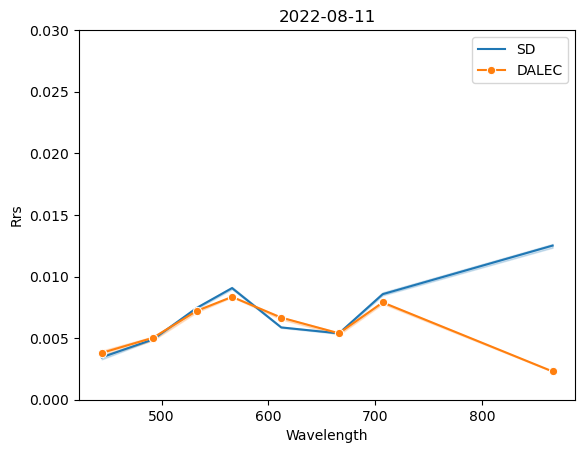

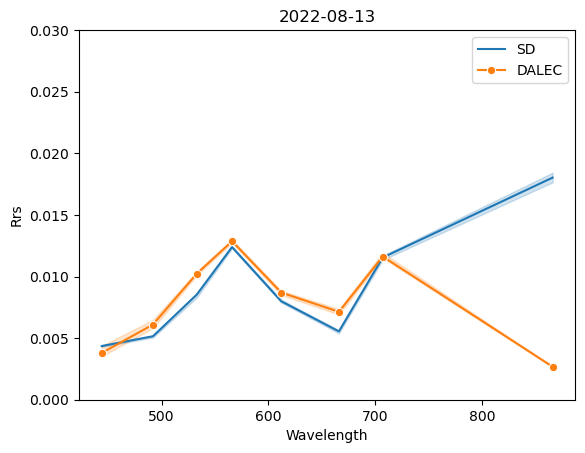

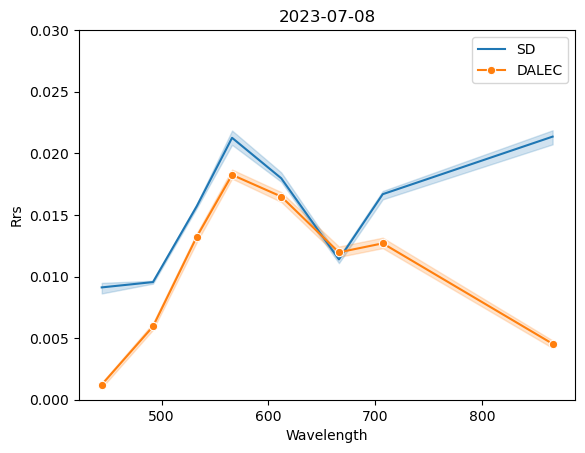

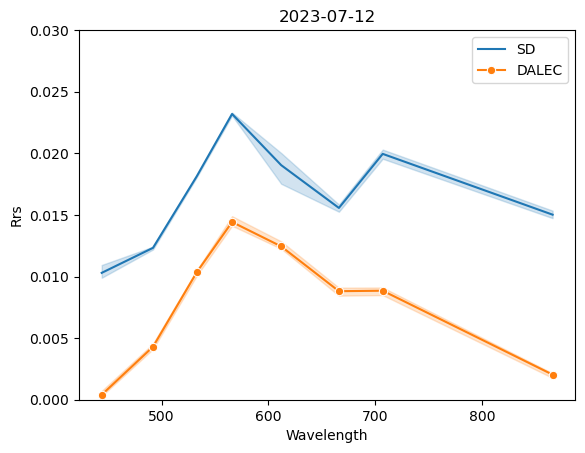

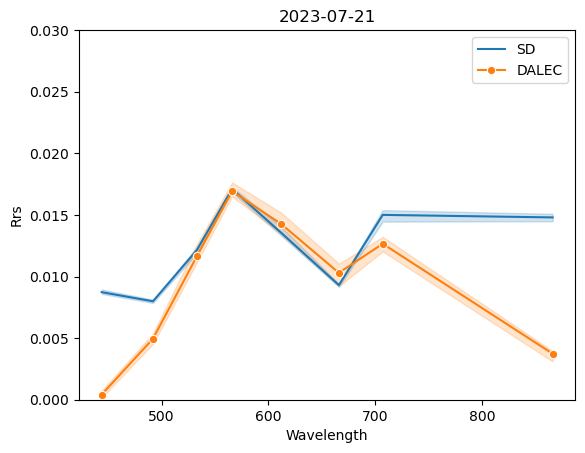

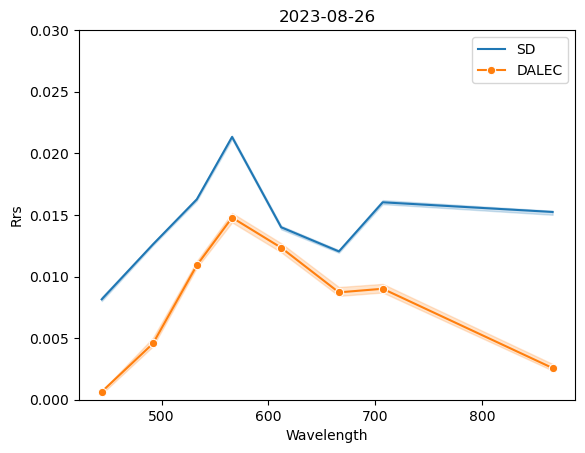

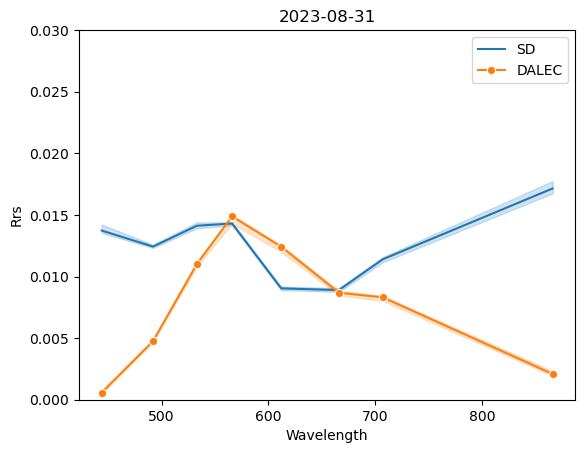

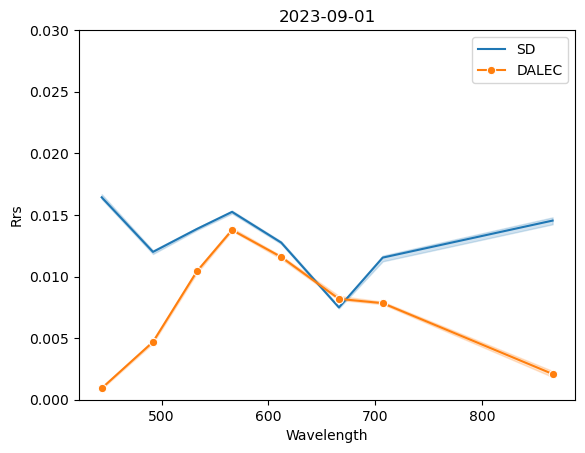

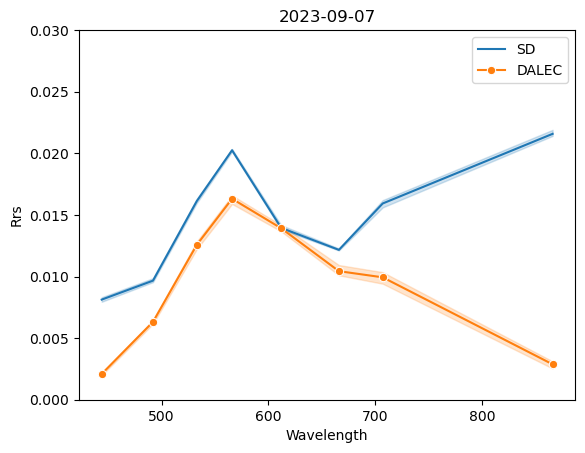

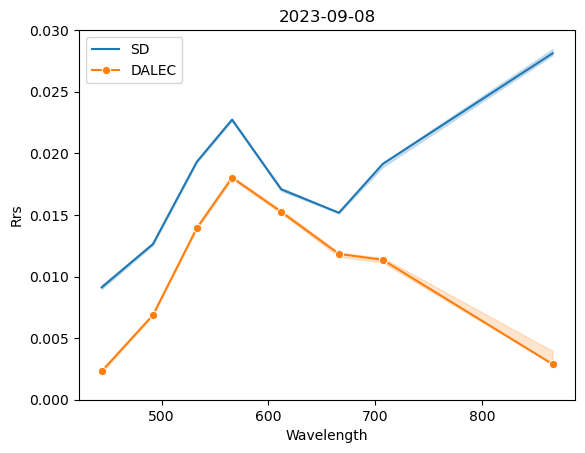

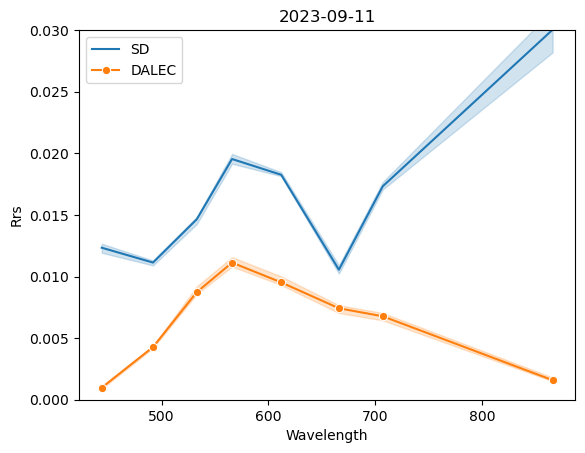

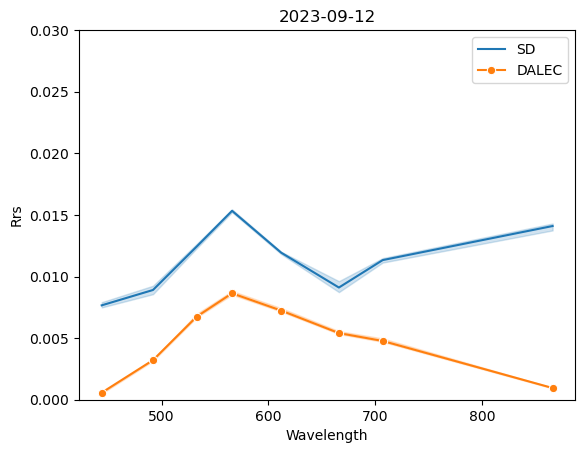

In [124]:
for date in dalec_df[dalec_df.date.isin(sds_melt.date)].date.unique():
    sns.lineplot(data=sds_melt[sds_melt.date==date],
                 x='Wavelength', y='Rrs', #hue='location',
                 estimator='median',
                 label='SD',
                 legend=True)
    sns.lineplot(data=dalec_df[dalec_df.date==date],
                 x='Wavelength', y='Rrs_DALEC', marker='o', 
                 estimator='median',
                 #hue='Date',
                 label='DALEC',
                 legend=True)
    plt.title(str(date))
    plt.legend()
    plt.ylim(0, 0.03)
    plt.show()

# spatial variation in SD images can not explain DALEC spectra

- we have many cases where the DALEC spectra from 2023 have very little correlation with the corresponding SD spectra
- particularly true for the blues and anything above 700 nm
- but, important to remember that there is still good correlation between DALEC and SDs for most bands
    - but with different offsets / gradients for each band
    - hard to say what is closer to the truth, especially seeing as blues and NIR are expected to be where we see most issue with atmos correction
    - really I think this means we need to 